In [178]:
import numpy as np
from qiskit.quantum_info import random_statevector, random_unitary

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
%matplotlib notebook

import scipy

# 1 dimension

In [4]:
num_qubits = 2

In [5]:
psia = random_statevector(dims=2**num_qubits).data
psib = random_statevector(dims=2**num_qubits).data
X = np.stack((psia,), axis=0)
Y = np.stack((psib,), axis=0)
print(X.shape, X)
print(Y.shape, Y)

(1, 4) [[ 0.23466078+0.09044082j -0.11408281+0.12718071j -0.57680147-0.11510162j
  -0.59957674-0.44958244j]]
(1, 4) [[ 1.86743616e-01-0.2748883j   1.46342065e-05+0.0284876j
  -5.96334429e-01-0.11022602j -6.38824181e-01+0.33599232j]]


In [6]:
d = np.linspace(0,2*2*np.pi,100)
res = []
for idx,D in enumerate(d):
    M = (np.diag(np.array([np.exp(1j * D)])) @ X).conj().T @ Y
    U, Sigma, V_d = np.linalg.svd(M)
    Omega = U @ V_d
    res.append(np.linalg.norm(np.diag(np.array([np.exp(1j * D)])) @ X @ Omega - Y)**2)
res = np.array(res)
print(res.min())
print(res.max())

2.0558042184805895e-32
4.412122926392749e-31


<IPython.core.display.Javascript object>


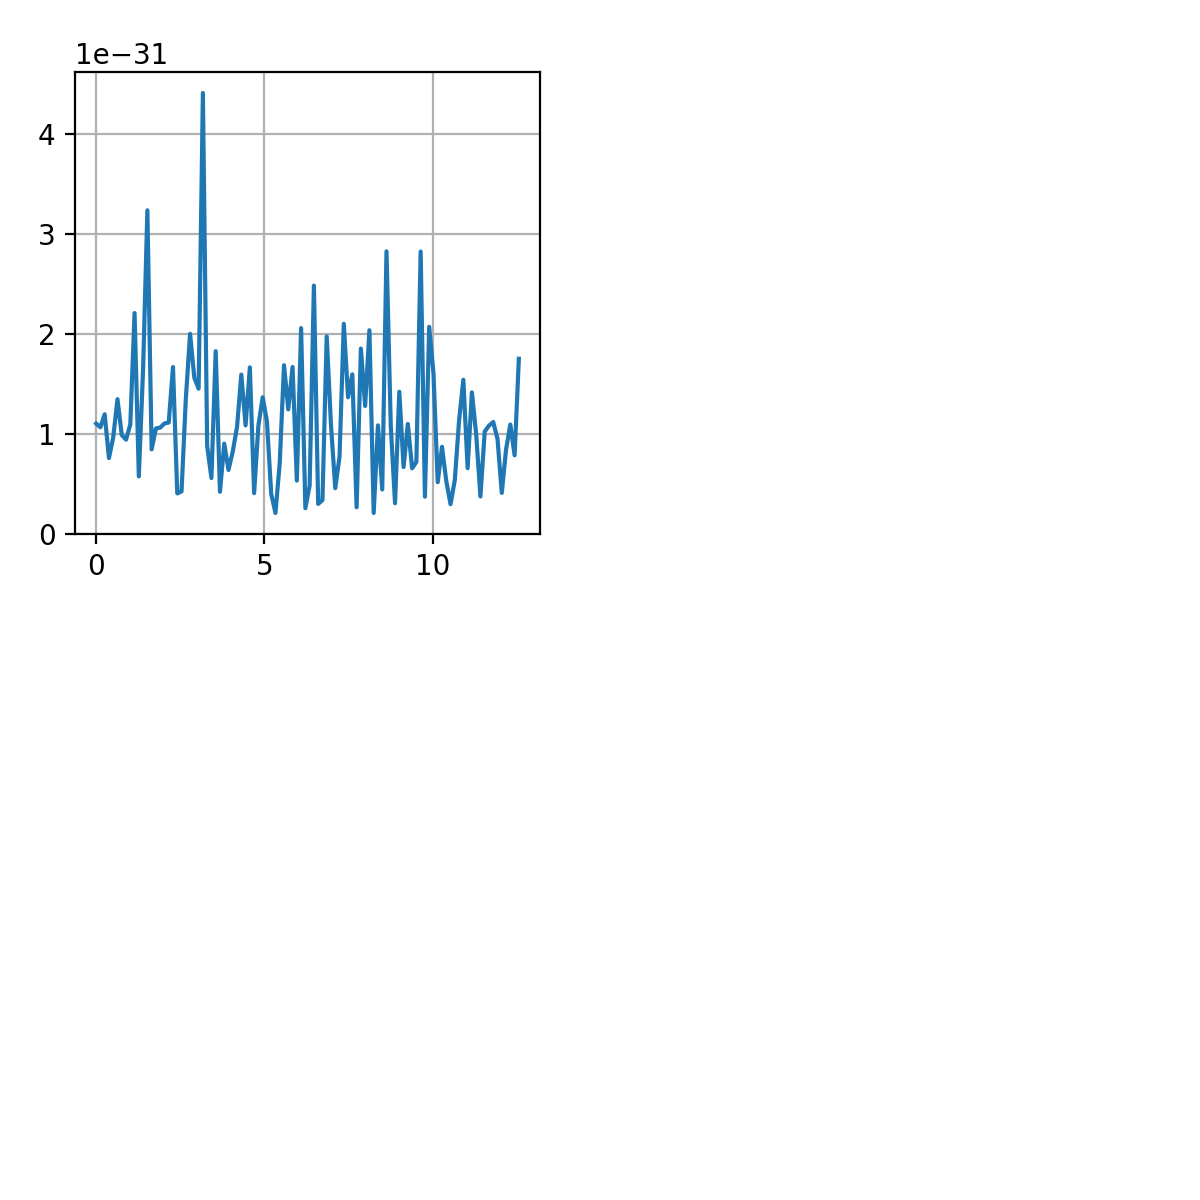

In [7]:
fig = plt.figure(figsize=(3,3))
plt.plot(d,res)
plt.grid()

# 2 dimension

In [26]:
num_qubits = 2

In [27]:
psi1 = random_statevector(dims=2**num_qubits).data
psi2 = random_statevector(dims=2**num_qubits).data
X = np.stack((psi1, psi2), axis=0)
print(X)
print(X.shape)

[[ 0.29285888-0.45362332j -0.06370091-0.24738896j  0.71624013+0.11329005j
  -0.3409165 +0.03379101j]
 [ 0.20707698-0.16456504j -0.19968839-0.26174863j  0.79132935+0.30672274j
   0.26188126+0.18107153j]]
(2, 4)


In [28]:
psi3 = random_statevector(dims=2**num_qubits).data
psi4 = random_statevector(dims=2**num_qubits).data
Y = np.stack((psi3, psi4), axis=0)
print(Y)
print(Y.shape)

[[-0.02848445+0.10157408j  0.74213455+0.09174782j -0.43186486+0.1287503j
  -0.47246613-0.05815367j]
 [ 0.46829724+0.3238795j   0.02641232-0.05193297j -0.07384787+0.22064366j
  -0.72552125-0.30312852j]]
(2, 4)


In [29]:
M = X.conj().T @ Y
U, Sigma, V_d = np.linalg.svd(M)

Omega = U @ V_d

In [30]:
np.linalg.norm(X @ Omega - Y)**2

0.07244334729727839

In [51]:
def obj_func(d, *args):
    M = (np.diag(np.exp(1j * d)) @ X).conj().T @ Y
    U, Sigma, V_dag = np.linalg.svd(M)
    Omega = U @ V_dag
    
    return np.linalg.norm(np.diag(np.exp(1j * d)) @ X @ Omega - Y)**2

# equal initial weighting
x0 = np.random.uniform(0,2*np.pi,2)
#x0 = [1.]*2
bounds = [(0,2*np.pi),]*2
res = scipy.optimize.minimize(obj_func, x0, bounds=bounds)
res

      fun: 0.059163562822934716
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.07958652e-06,  2.05252483e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 21
      nit: 3
     njev: 7
   status: 0
  success: True
        x: array([3.33973239, 3.06158803])

In [52]:
d = np.linspace(0,2*2*np.pi,100,endpoint=False)
#print(d.shape)
xx, yy = np.meshgrid(d,d)
dd = np.append(xx.reshape(-1,1),yy.reshape(-1,1),axis=1)
dd

array([[ 0.        ,  0.        ],
       [ 0.12566371,  0.        ],
       [ 0.25132741,  0.        ],
       ...,
       [12.1893795 , 12.44070691],
       [12.3150432 , 12.44070691],
       [12.44070691, 12.44070691]])

In [53]:
# M = X.conj().T @ Y
# U, Sigma, V_d = np.linalg.svd(M)

# Omega = U @ V_d
res = []
for idx,D in enumerate(dd):
    M = (np.diag(np.exp(1j * D)) @ X).conj().T @ Y
    U, Sigma, V_d = np.linalg.svd(M)
    Omega = U @ V_d
    res.append(np.linalg.norm(np.diag(np.exp(1j * D)) @ X @ Omega - Y)**2)
res = np.array(res).reshape(100,100)

In [54]:
print(res.min())
print(res.max())

0.059287640830280396
0.8229077586132777


<IPython.core.display.Javascript object>


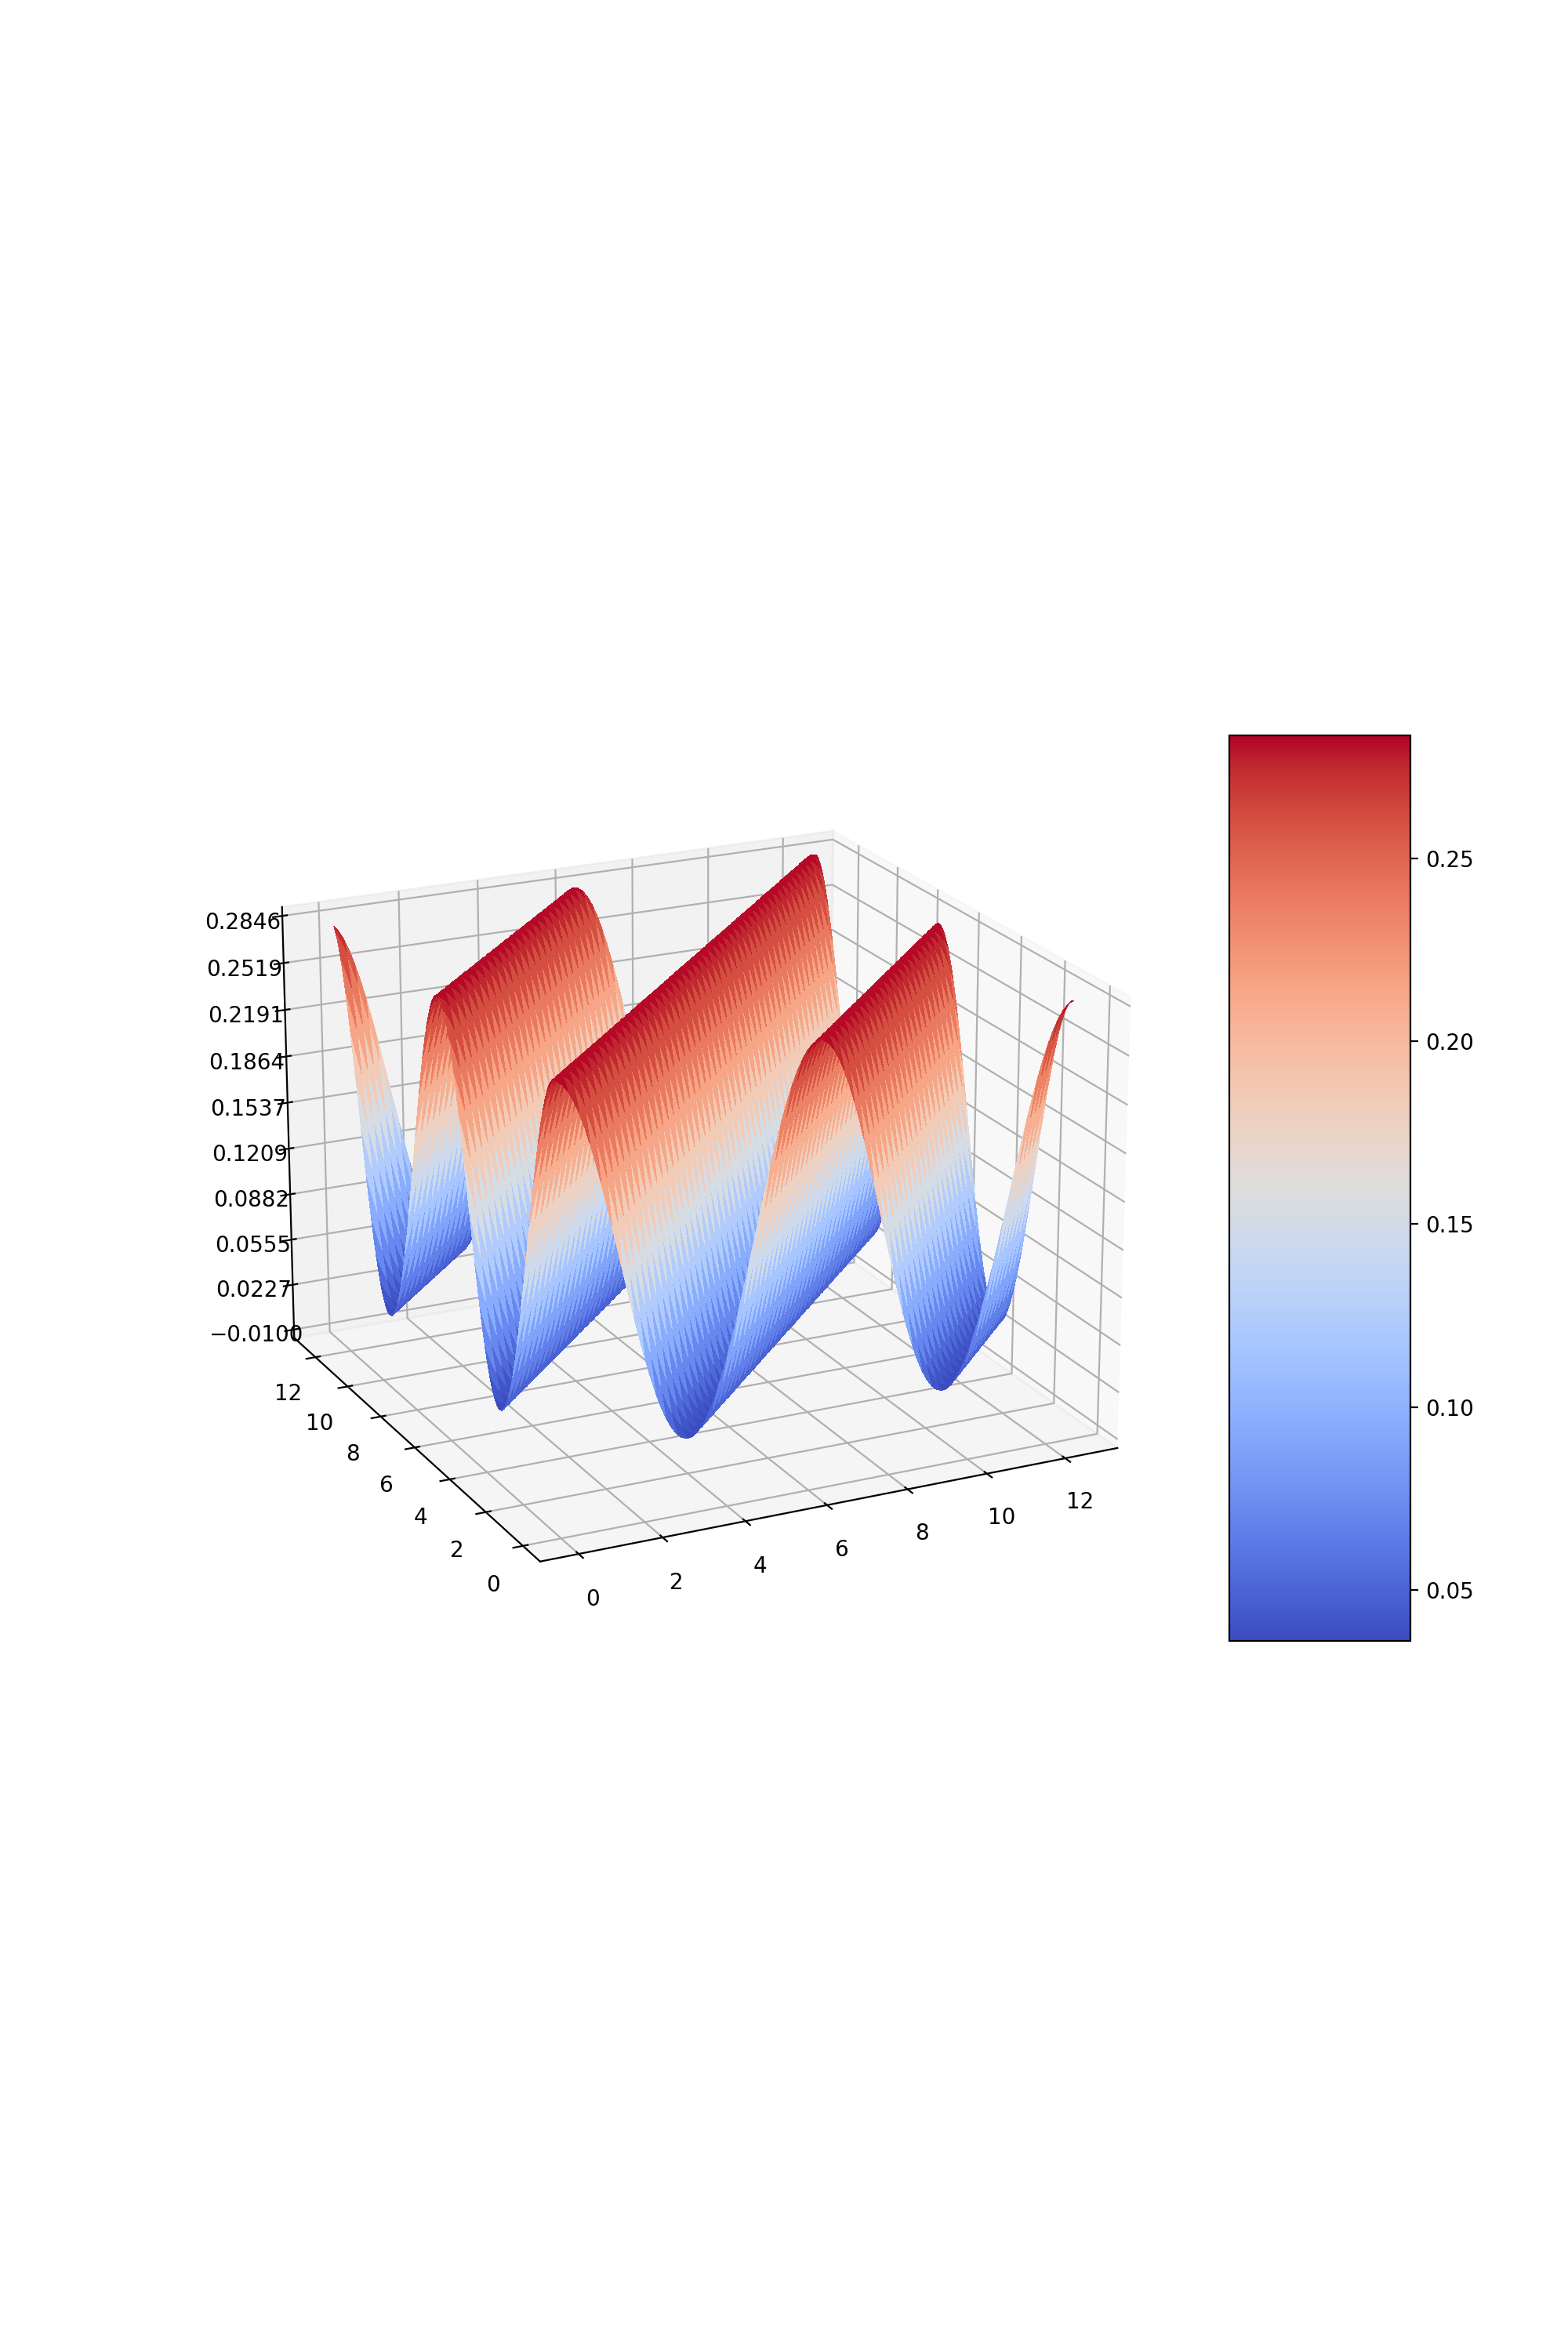

In [17]:
fig = plt.figure(figsize=(10,15))
ax = plt.axes(projection='3d')

surface = ax.plot_surface(xx, yy, res, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01)
ax.zaxis.set_major_locator(LinearLocator(10))
fig.colorbar(surface, shrink=0.5, aspect=5)

# Quantum

In [276]:
num_qubits = 4
num_states = 16*17
U = random_unitary(dims=(2**num_qubits)).data
X = np.zeros(shape=(num_states,2**num_qubits), dtype=np.complex64)
Y = np.zeros(shape=(num_states,2**num_qubits), dtype=np.complex64)
for i in range(num_states):
    X[i] = random_statevector(dims=2**num_qubits).data
for i in range(num_states):
    #Y[i] = random_statevector(dims=2**num_qubits).data
    Y[i] = U @ X[i]
    

In [277]:
random_phase = np.random.uniform(0,2*np.pi, num_states)
for i in range(len(Y)):
    Y[i] *= np.exp(1j * random_phase[i])
print(Y[0])

[ 0.1142339 +0.10756737j  0.13687295-0.12163982j  0.10873957+0.00975272j
 -0.15818684+0.03659832j -0.25018102+0.09572043j -0.02719445-0.06959823j
 -0.42954418+0.11600642j  0.3126227 +0.03027934j  0.44141555-0.22238214j
  0.15578121+0.12779509j -0.03225774+0.09365325j  0.1340104 +0.0223j
  0.02277813+0.22900176j -0.23131523-0.12381513j  0.08500341+0.07403139j
  0.09814535+0.26890695j]


In [278]:
M = X.conj().T @ Y
U, Sigma, V_d = np.linalg.svd(M)

Omega = U @ V_d
no_phase_res = np.linalg.norm(X @ Omega - Y)**2

print(no_phase_res)
print(Omega)

430.30710480161724
[[ 0.05454377+7.64810219e-02j  0.12504365+5.65712303e-02j
   0.10289242+2.86823899e-01j -0.5291581 -1.75067902e-01j
   0.01796232-1.06991574e-01j  0.08196051-1.81022927e-01j
   0.21726817-1.14646822e-01j  0.20048168-1.12083554e-01j
   0.04171818+3.45155299e-02j  0.03158866-7.75609612e-02j
   0.31776997+1.51712999e-01j -0.08096004+1.24173336e-01j
   0.33542207-1.00239336e-01j -0.16660872-1.42252192e-01j
   0.16011184-1.49935931e-02j -0.09869336-2.05916181e-01j]
 [-0.13269553+2.16142833e-03j  0.08181657-5.80735765e-02j
  -0.2651849 -4.31586653e-02j -0.00171649-3.58709060e-02j
   0.16953447-2.64273196e-01j  0.02845434-6.63334876e-02j
   0.16325048-8.03036392e-02j -0.24307863+2.40834981e-01j
  -0.07088585+1.90573961e-01j  0.47588494+1.42024934e-01j
   0.25921458-2.37224728e-01j -0.05644433-2.63885111e-02j
  -0.02668271-7.83091187e-02j -0.13744104-2.06243098e-01j
  -0.08003229-1.31072432e-01j  0.01260585+3.70836556e-01j]
 [ 0.1258761 +1.06470332e-01j -0.21192703-1.8696558

In [284]:
print(obj_func(np.random.uniform(0,2*np.pi,num_states)))
print(obj_func(np.zeros(num_states)))
print(obj_func(random_phase))

1.5908059388121791
1.5820107246644577
2.3458734948469095e-15


In [321]:
def obj_func_euc(d, *args):
    phased_X = np.diag(np.exp(1j * d)) @ X
    M = phased_X.conj().T @ Y
    U, Sigma, V_dag = np.linalg.svd(M)
    Omega = U @ V_dag
    f = np.linalg.norm(phased_X @ Omega - Y)**2
    #print(f)
    return f

In [312]:
def obj_func_nuc(d, *args):
    M = (np.diag(np.exp(1j * d)) @ X).conj().T @ Y
    f = 2*num_states - 2*np.linalg.norm(M,ord='nuc')
    print(f)
    return f

In [322]:
start = time.time()

num_trials = 1

for _ in range(num_trials):
    # equal initial weighting
    #x0 = np.random.uniform(0,2*np.pi,num_states)
    x0 = [0.3]*num_states
    #x0 = random_phase + 0.1*np.random.uniform(0,2*np.pi,num_states)
    #x0 = np.random.uniform(0,2*np.pi,num_states)
    bounds = [(0,2*np.pi),]*num_states
    res = scipy.optimize.minimize(obj_func_euc, x0)
    print(res.fun)
    
end = time.time()
print(end - start)

3.158647650963939e-11
12.565135955810547


In [316]:
start = time.time()

num_trials = 1

for _ in range(num_trials):
    # equal initial weighting
    #x0 = np.random.uniform(0,2*np.pi,num_states)
    x0 = [0.3]*num_states
    #x0 = random_phase + 0.1*np.random.uniform(0,2*np.pi,num_states)
    #x0 = np.random.uniform(0,2*np.pi,num_states)
    bounds = [(0,2*np.pi),]*num_states
    res = scipy.optimize.minimize(obj_func_nuc, x0)
    print(res.fun)
    
end = time.time()
print(end - start)

430.3069153610694
430.30691536837435
430.3069153691196
430.30691534624026
430.30691535871574
430.30691536738743
430.3069153626103
430.3069153492116
430.30691535285496
430.3069153597676
430.3069153701199
430.30691536749
430.3069153648455
430.306915355799
430.30691536811474
430.30691535927895
430.30691535724503
430.3069153551669
430.3069153705303
430.30691534915275
430.30691535496226
430.3069153702522
430.3069153567063
430.306915361244
430.30691535881994
430.30691536491554
430.3069153603784
430.3069153732901
430.30691536581116
430.30691535342083
430.30691535514677
430.30691535195126
430.3069153688089
430.3069153727488
430.30691535787025
430.30691535528945
430.3069153575657
430.30691536095424
430.3069153686457
430.30691536406715
430.30691535536357
430.3069153578047
430.3069153547939
430.3069153663146
430.3069153674353
430.30691535937854
430.3069153529892
430.30691537074887
430.30691535540143
430.30691535828555
430.30691534754584
430.30691535997767
430.30691535232745
430.3069153641523
430.

422.8121862871337
422.8121862898415
422.8121863067109
422.8121862933989
422.81218630091894
422.8121863011435
422.8121863115798
422.81218628975626
422.81218629868897
422.8121863058295
422.81218628491916
422.81218629710855
422.81218630067445
422.81218630458807
422.8121862936054
422.8121863001066
422.8121863004012
422.8121863048489
422.8121862899093
422.8121862893164
422.81218628915565
422.8121862940077
422.8121862907421
422.8121862893445
422.8121863014082
422.8121862912471
422.8121862908389
422.8121863020043
422.8121862874631
422.81218629984335
422.8121863036331
422.8121862980835
422.8121862959206
422.8121862942013
422.812186295429
387.8328838656918
387.8328838777172
387.8328838803305
387.832883844343
387.8328838671388
387.83288386537356
387.83288387849046
387.8328838483941
387.83288386394224
387.83288387398494
387.83288386970133
387.8328838718592
387.8328838805991
387.83288387469776
387.83288387838877
387.8328838617098
387.83288387290725
387.83288385231157
387.8328838834663
387.83288385

322.1208438109368
322.120843798575
322.120843814374
322.12084376934445
322.12084381328236
322.1208437671203
322.1208437743038
322.1208437993557
338.8215326489069
338.8215326349483
338.8215326223643
338.82153266466173
338.82153265963734
338.82153267418977
338.8215326491062
338.8215326734271
338.82153267313925
338.8215326617744
338.82153262321793
338.82153262474696
338.82153264229134
338.82153262927613
338.82153262317615
338.82153265717545
338.8215326704003
338.82153267215233
338.82153262311635
338.821532660049
338.821532674878
338.8215326234384
338.8215326605375
338.82153265848353
338.82153265043
338.82153267416754
338.8215326420103
338.8215326248042
338.8215326305651
338.8215326749127
338.8215326676986
338.8215326748511
338.8215326322325
338.82153262442824
338.8215326631818
338.82153266897075
338.82153267228455
338.8215326500941
338.8215326287299
338.82153263983247
338.8215326709421
338.8215326632908
338.8215326661248
338.8215326298193
338.8215326262088
338.8215326264325
338.8215326720

272.70323804815564
272.70323800045156
272.7032380245888
272.7032379934022
272.70323803270605
272.70323799626937
272.70323801052257
272.70323803663376
272.7032380381245
272.7032380200824
272.70323804957013
272.7032380132753
272.70323801877095
272.7032380408957
272.70323801394375
272.70323799306254
272.7032380324398
272.7032380382367
272.7032380439508
272.70323799690254
272.70323804640276
272.7032379973401
272.7032379970362
272.70323803161045
185.37808220001807
185.37808220027443
185.37808218506973
185.3780822282863
185.3780822062928
185.3780822290289
185.37808220868857
185.37808221741523
185.3780822293246
185.37808221735287
185.37808217249523
185.37808218159103
185.37808220366742
185.37808217969842
185.3780821845118
185.3780822048933
185.37808221835434
185.37808220952127
185.3780821783226
185.37808222847877
185.37808221908256
185.37808217233498
185.378082202957
185.37808220860495
185.3780821944282
185.3780822278535
185.37808219211956
185.3780821745952
185.37808219807783
185.378082209568

61.903224753011216
61.90322475196729
61.903224755224926
61.903224750116294
61.903224754574865
61.90322476051335
61.90322476251902
61.90322474849211
61.90322476116461
61.9032247507032
61.9032247578794
61.903224760795524
61.90322476581298
61.90322476611465
61.90322475525221
61.90322475096423
61.903224753548784
61.903224761917045
61.903224745999864
61.903224728583496
61.903224757972
61.90322474314638
61.90322477164989
61.90322476109469
61.90322474536765
61.903224743484884
61.903224738310996
61.90322474845391
61.903224756493216
61.90322475940445
61.903224740550684
61.90322475995191
61.903224751797154
61.90322475799411
61.90322476200629
61.90322472728724
61.9032247601387
61.90322475395351
61.903224730339616
61.903224748460275
61.903224751997755
61.90322475564875
61.90322475114715
61.90322477756632
61.903224749968956
61.903224764915535
61.90322475457555
61.90322474569467
61.903224750048935
61.903224752107405
61.903224774455566
61.90322475676686
61.90322475314616
61.90322476163914
61.90322476

24.749883000636146
24.749882991480604
24.749882994117115
24.74988300071368
24.74988300141706
24.749882999045894
24.74988299452548
24.749882998285784
24.74988299165807
24.74988296826757
24.749882998578755
24.749882988402078
24.749882980896018
24.74988298481128
24.749882995596295
24.749882988522813
24.74988299659185
24.749883014962506
24.749882984651435
24.749882994813333
24.74988299622578
24.7498829850108
24.74988299156155
24.749882990675587
24.749882978495975
24.749882996118345
24.7498829876547
24.74988298816652
24.7498829999862
24.749882999162764
24.749882993934307
24.749882990344076
24.74988300085988
24.749882990252786
24.74988299772599
24.749882985552517
24.7498829993541
24.749882998519183
24.74988298997141
24.749882991384084
24.74988299738129
24.749882994834365
24.74988299710367
24.74988299266215
24.74988299223594
24.749882995932467
24.749882992262997
24.749882998576823
24.749882995270355
24.74988299831716
24.749882987619003
24.749882985434283
24.749882995811276
24.74988300066036
2

12.986423791731568
12.986423793034646
12.986423784518365
12.986423793685276
12.986423797828024
12.986423792812502
12.986423785071565
12.9864237847097
12.986423798764918
12.986423788467846
12.986423790793651
12.986423793140602
12.986423790161098
12.986423795613518
12.98642379066007
12.986423797460702
12.986423797486509
12.986423787598937
12.986423785537681
12.986423792481673
12.986423787759577
12.98642378613431
12.986423788651337
12.986423788096545
12.986423788795264
12.986423794493703
12.986423798122132
12.986423793647418
12.986423787891681
12.986423761787592
12.986423800279908
12.986423795158771
12.986423786805972
12.986423788880302
12.98642379437706
12.986423790658591
12.98642378968566
12.986423786960245
12.98642378536158
12.98642379704961
12.986423790356412
12.986423796746976
12.986423795070323
12.986423787054264
12.986423795744258
12.986423795059864
12.986423792981782
12.986423789133482
12.986423798350188
12.9864237920998
12.986423788471257
12.986423796989243
12.986423790847539
12.

4.757855267336822
4.757855268754611
4.757855266118099
4.757855267969717
4.757855268300887
4.757855267034529
4.757855264822297
4.7578552695595135
4.757855267718014
4.757855266225533
4.757855263473857
4.757855266571369
4.757855264501586
4.757855266508386
4.757855267718014
4.757855266522597
4.757855265501348
4.75785526619552
4.757855266536922
4.757855265620947
4.757855267752575
4.757855269933202
4.7578552661082085
4.757855264235673
4.75785526676691
4.757855266194838
4.7578552678140795
4.7578552654260875
4.757855264319915
4.757855264506588
4.757855263851525
4.757855270181608
4.757855269057018
4.757855271040285
4.757855266178467
4.7578552639195095
4.757855268644562
4.757855265034323
4.757855268228013
4.757855264637101
4.757855265517833
4.757855264707473
4.757855268913318
4.757855265342187
4.7578552668879865
4.757855266140723
4.757855266646175
4.7578552657996624
4.757855266621391
4.757855266862862
4.757855266104002
4.7578552658319495
4.7578552681745805
4.757855263001147
4.757855266476781
4.7

2.27073167302251
2.270731673325031
2.270731672161446
2.270731672958732
2.2707316731243736
2.2707316718897346
2.270731673014666
2.2707316732522713
2.270731662980552
2.270731672833108
2.2707316727727402
2.2707316726459794
2.270731673636874
2.2707316728012756
2.2707316709919496
2.270731673347882
2.2707316730521825
2.2707316739413272
2.270731672842885
2.2707316734794176
2.2707316727939997
2.2707316733153675
2.270731673617661
2.550050885619271
2.5500508889208504
2.5500508863897267
2.550050884311304
2.550050884362804
2.55005088998098
2.5500508862071456
2.5500508849172547
2.550050882341793
2.5500508868925635
2.5500508897016516
2.5500508865742404
2.550050886007284
2.5500508803268076
2.5500508870029535
2.5500508864071207
2.5500508837787947
2.550050886439294
2.5500508868926772
2.550050881936045
2.550050883131007
2.55005089000565
2.5500508852510393
2.550050885110295
2.5500508848065238
2.5500508890065703
2.5500508853627935
2.5500508885879754
2.5500508847192123
2.550050885995006
2.5500508832594733


0.7914645234625368
0.7914645225220056
0.791464523241757
0.7914645225030199
0.791464525413744
0.7914645226501307
0.7914645256789754
0.7914645225830554
0.791464523211971
0.7914645212966889
0.791464522011438
0.7914645218534133
0.7914645232705197
0.7914645228145218
0.7914645225412187
0.7914645222349463
0.7914645238107596
0.7914645237311788
0.7914645231410304
0.791464523589184
0.7914645240442724
0.7914645218424994
0.7914645225388313
0.7914645235264288
0.7914645227733672
0.7914645193869774
0.7914645232601742
0.7914645246560212
0.7914645270603842
0.7914645239922038
0.7914645245075462
0.7914645228140671
0.7914645236330671
0.7914645200810355
0.7914645237215154
0.7914645227289157
0.7914645229570851
0.7914645223935395
0.7914645232384601
0.7914645231928716
0.7914645199591632
0.7914645234126283
0.7914645230177939
0.791464521316243
0.7914645231309123
0.7914645234982345
0.7914645228022437
0.7914645225653203
0.7914645211401421
0.791464523014497
0.7914645237965487
0.7914645245837164
0.7914645256526001


0.018318966360084232
0.01831896629653329
0.018318966231731793
0.018318966037213613
0.018318966339393228
0.01831896638998387
0.018318966200354225
0.01831896624298679
0.018318966353490396
0.01831896640794639
0.018318966325750807
0.018318966377592005
0.01831896632779717
0.018318965801199738
0.018318965769367423
0.018318965915568697
0.01831896638032049
0.01831896624912588
0.018318966406809523
0.0183189662325276
0.018318966221613664
0.018318966347010246
0.01831896590795168
0.018318966161132266
0.018318965795970144
0.018318966293804806
0.018318966293463745
0.01831896640726427
0.018318966354172517
0.018318966333140452
0.018318966321544394
0.018318966297442785
0.018318966239576184
0.0183189662800487
0.01831896617136408
0.018318966423521488
0.018318966790047853
0.01831896637520458
0.018318966316883234
0.018318966235710832
0.01831896632347707
0.01831896606176997
0.018318966270044257
0.018318966329047726
0.018318966305741924
0.018318966295282735
0.018318966129527325
0.0183189662022869
0.018318966

0.0026401717627777543
0.002640171779262346
0.0026401716938835307
0.002640171825305515
0.002640171770735833
0.002640171789039414
0.002640171643179201
0.0026401718417901066
0.002640171816892689
0.002640171881466813
0.0026401717124144852
0.0026401717648241174
0.0026401716896771177
0.0026401717288990767
0.0026401717989301687
0.0026401718664601503
0.002640171744928921
0.0026401718031365817
0.002640171731513874
0.002640171679558989
0.002640171777102296
0.002640171772782196
0.00264017185963894
0.002640171741177255
0.00010932315626632771
0.00010932313944067573
0.00010932315194622788
0.00010932311477063195
0.00010932315512945934
0.00010932315331046993
0.00010932313216471812
0.00010932320469692058
0.00010932314603451232
0.0001093231221602764
0.00010932316251910379
0.00010932316024536703
0.00010932314432920975
0.00010932313739431265
0.00010932314103229146
0.00010932313148259709
0.00010932315456102515
0.00010932313887224154
0.0001093231619506696
0.00010932311147371365
0.0001093231619506696
0.00010

2.5930697347575915e-05
2.5930679385055555e-05
2.5930697916010104e-05
2.593070007606002e-05
2.593069166323403e-05
2.593068506939744e-05
2.5930698825504805e-05
2.5930707806764985e-05
2.593070109924156e-05
2.5930699962373183e-05
2.5930706783583446e-05
2.5930713263733196e-05
2.5930699393938994e-05
2.59307021224231e-05
2.5930694391718134e-05
2.5930695301212836e-05
2.5930706669896608e-05
2.593070564671507e-05
2.5930682795660687e-05
2.5930693368536595e-05
2.5930697461262753e-05
2.5930700758181047e-05
2.5930701895049424e-05
2.5930688707376248e-05
2.593069757494959e-05
2.5930705419341393e-05
2.593070405509934e-05
2.5930706897270284e-05
2.593069302747608e-05
2.5930684500963253e-05
2.5930706442522933e-05
2.5930688934749924e-05
2.5930688252628897e-05
2.593067506495572e-05
2.593069962131267e-05
2.5930691208486678e-05
2.5930710762622766e-05
2.593069916656532e-05
2.5930690526365652e-05
2.5930697347575915e-05
2.593071008050174e-05
2.593068506939744e-05
2.5930696210707538e-05
2.5930705760401906e-05
2.5

-1.5894631815172033e-06
-1.5894618172751507e-06
-1.5894613625277998e-06
-1.5894634088908788e-06
-1.589462954143528e-06
-1.5894622720225016e-06
-1.5894626130830147e-06
-1.5894634088908788e-06
-1.5894623857093393e-06
-1.5894626130830147e-06
-1.589462499396177e-06
-1.5894630678303656e-06
-1.5894631815172033e-06
-1.5894634088908788e-06
-1.5894638636382297e-06
-1.5894621583356638e-06
-1.5894630678303656e-06
-1.5894622720225016e-06
-1.589463749951392e-06
-1.5894610214672866e-06
-1.5894636362645542e-06
-1.5894627267698525e-06
-1.5894620446488261e-06
-1.5894615899014752e-06
-1.589462499396177e-06
-1.5894630678303656e-06
-1.5894619309619884e-06
-1.5894640910119051e-06
-1.5894630678303656e-06
-1.5894627267698525e-06
-1.5894619309619884e-06
-1.5894627267698525e-06
-1.5894618172751507e-06
-1.5894626130830147e-06
-1.5894618172751507e-06
-1.5894622720225016e-06
-1.589462499396177e-06
-1.5894626130830147e-06
-1.5894623857093393e-06
-1.5894638636382297e-06
-1.589462954143528e-06
-1.5894615899014752e-0

-1.7407980976713588e-06
-1.7407980976713588e-06
-1.740797642924008e-06
-1.7407978702976834e-06
-1.7407982113581966e-06
-1.7407980976713588e-06
-1.7407980976713588e-06
-1.7407980976713588e-06
-1.7407983250450343e-06
-1.7407978702976834e-06
-1.7407983250450343e-06
-1.740798438731872e-06
-1.740797642924008e-06
-1.7407980976713588e-06
-1.7407980976713588e-06
-1.7407983250450343e-06
-1.7407979839845211e-06
-1.7407977566108457e-06
-1.7407980976713588e-06
-1.7407983250450343e-06
-1.7407978702976834e-06
-1.7407980976713588e-06
-1.7407980976713588e-06
-1.7407980976713588e-06
-1.7407983250450343e-06
-1.7407978702976834e-06
-1.7407977566108457e-06
-1.7407980976713588e-06
-1.7407980976713588e-06
-1.7407978702976834e-06
-1.7407980976713588e-06
-1.7407979839845211e-06
-1.7407978702976834e-06
-1.7407979839845211e-06
-1.7407980976713588e-06
-1.7407980976713588e-06
-1.7407978702976834e-06
-1.7407980976713588e-06
-1.7407978702976834e-06
-1.7407979839845211e-06
-1.7407980976713588e-06
-1.7407982113581966

-1.741151663736673e-06
-1.741151663736673e-06
-1.7411512089893222e-06
-1.7411517774235108e-06
-1.7411515500498354e-06
-1.741151663736673e-06
-1.741151663736673e-06
-1.741151663736673e-06
-1.7411515500498354e-06
-1.741151663736673e-06
-1.7411515500498354e-06
-1.7411514363629976e-06
-1.74115132267616e-06
-1.741151663736673e-06
-1.74115132267616e-06
-1.741151663736673e-06
-1.7411515500498354e-06
-1.7411518911103485e-06
-1.7411514363629976e-06
-1.7411515500498354e-06
-1.7411514363629976e-06
-1.7411517774235108e-06
-1.7411515500498354e-06
-1.741151663736673e-06
-1.741151663736673e-06
-1.741151663736673e-06
-1.7411514363629976e-06
-1.741151663736673e-06
-1.7411514363629976e-06
-1.741151663736673e-06
-1.7411514363629976e-06
-1.7411514363629976e-06
-1.741151663736673e-06
-1.7411514363629976e-06
-1.741151663736673e-06
-1.7411512089893222e-06
-1.7411514363629976e-06
-1.7411514363629976e-06
-1.741151663736673e-06
-1.7411515500498354e-06
-1.7411515500498354e-06
-1.7411514363629976e-06
-1.741151550

-1.7426064005121589e-06
-1.7426061731384834e-06
-1.7426062868253211e-06
-1.7426061731384834e-06
-1.7426064005121589e-06
-1.7426064005121589e-06
-1.7426062868253211e-06
-1.7426064005121589e-06
-1.7426065141989966e-06
-1.7426064005121589e-06
-1.7426061731384834e-06
-1.7426064005121589e-06
-1.7426066278858343e-06
-1.7426064005121589e-06
-1.7426061731384834e-06
-1.7426061731384834e-06
-1.7426064005121589e-06
-1.7426064005121589e-06
-1.7426064005121589e-06
-1.7426062868253211e-06
-1.7426064005121589e-06
-1.7426064005121589e-06
-1.7426064005121589e-06
-1.7426066278858343e-06
-1.7426064005121589e-06
-1.7426065141989966e-06
-1.7426064005121589e-06
-1.7426061731384834e-06
-1.7426062868253211e-06
-1.7426064005121589e-06
-1.7426061731384834e-06
-1.7426064005121589e-06
-1.7426064005121589e-06
-1.7426062868253211e-06
-1.7426061731384834e-06
-1.7426060594516457e-06
-1.7426065141989966e-06
-1.7426064005121589e-06
-1.7426064005121589e-06
-1.7426062868253211e-06
-1.7426064005121589e-06
-1.7426064005121

-1.743952338983945e-06
-1.7439522252971074e-06
-1.7439521116102696e-06
-1.7439522252971074e-06
-1.7439522252971074e-06
-1.7439524526707828e-06
-1.7439524526707828e-06
-1.7439521116102696e-06
-1.7455950001021847e-06
-1.745594886415347e-06
-1.7455950001021847e-06
-1.7455950001021847e-06
-1.7455950001021847e-06
-1.745594886415347e-06
-1.7455950001021847e-06
-1.7455950001021847e-06
-1.7455950001021847e-06
-1.7455947727285093e-06
-1.745594886415347e-06
-1.7455950001021847e-06
-1.7455950001021847e-06
-1.7455950001021847e-06
-1.7455950001021847e-06
-1.7455952274758602e-06
-1.745594886415347e-06
-1.7455950001021847e-06
-1.7455952274758602e-06
-1.7455947727285093e-06
-1.7455950001021847e-06
-1.7455950001021847e-06
-1.7455950001021847e-06
-1.745594886415347e-06
-1.745594886415347e-06
-1.7455950001021847e-06
-1.7455950001021847e-06
-1.7455950001021847e-06
-1.7455950001021847e-06
-1.7455950001021847e-06
-1.7455947727285093e-06
-1.7455950001021847e-06
-1.7455950001021847e-06
-1.7455947727285093e-06

-1.7465046084907954e-06
-1.7465046084907954e-06
-1.7465046084907954e-06
-1.7465044948039576e-06
-1.7465044948039576e-06
-1.7465044948039576e-06
-1.7465044948039576e-06
-1.746504722177633e-06
-1.7465046084907954e-06
-1.7465046084907954e-06
-1.7465046084907954e-06
-1.746504722177633e-06
-1.7465044948039576e-06
-1.7465044948039576e-06
-1.7465044948039576e-06
-1.7465044948039576e-06
-1.7465044948039576e-06
-1.746504722177633e-06
-1.7465044948039576e-06
-1.74650438111712e-06
-1.7465046084907954e-06
-1.7465044948039576e-06
-1.7465044948039576e-06
-1.7465044948039576e-06
-1.7465046084907954e-06
-1.7465046084907954e-06
-1.746504722177633e-06
-1.7465046084907954e-06
-1.74650438111712e-06
-1.7465044948039576e-06
-1.7465044948039576e-06
-1.7465046084907954e-06
-1.7465044948039576e-06
-1.7465044948039576e-06
-1.7465046084907954e-06
-1.7465044948039576e-06
-1.7465044948039576e-06
-1.7465046084907954e-06
-1.7465044948039576e-06
-1.746504722177633e-06
-1.74650438111712e-06
-1.7465044948039576e-06
-1.

-1.7466018107370473e-06
-1.7466018107370473e-06
-1.7466020381107228e-06
-1.7466018107370473e-06
-1.7466018107370473e-06
-1.7466020381107228e-06
-1.7466018107370473e-06
-1.746601924423885e-06
-1.7466020381107228e-06
-1.746601924423885e-06
-1.746601924423885e-06
-1.7466020381107228e-06
-1.746601924423885e-06
-1.7466020381107228e-06
-1.7466018107370473e-06
-1.7466018107370473e-06
-1.746601924423885e-06
-1.7466020381107228e-06
-1.7466018107370473e-06
-1.7466018107370473e-06
-1.746601924423885e-06
-1.746601924423885e-06
-1.746601924423885e-06
-1.7466020381107228e-06
-1.7466020381107228e-06
-1.7466020381107228e-06
-1.7466020381107228e-06
-1.746601924423885e-06
-1.7466020381107228e-06
-1.7466018107370473e-06
-1.7466018107370473e-06
-1.746601924423885e-06
-1.7466018107370473e-06
-1.7466020381107228e-06
-1.746601924423885e-06
-1.7466020381107228e-06
-1.746601924423885e-06
-1.746601924423885e-06
-1.7466020381107228e-06
-1.7466018107370473e-06
-1.7466020381107228e-06
-1.7466021517975605e-06
-1.74

-1.7467083353039925e-06
-1.7467083353039925e-06
-1.7467084489908302e-06
-1.7467083353039925e-06
-1.7467082216171548e-06
-1.7467082216171548e-06
-1.7467084489908302e-06
-1.7467083353039925e-06
-1.7467084489908302e-06
-1.7467083353039925e-06
-1.7467083353039925e-06
-1.746708562677668e-06
-1.7467083353039925e-06
-1.7467084489908302e-06
-1.7467083353039925e-06
-1.746708562677668e-06
-1.7467083353039925e-06
-1.7467082216171548e-06
-1.7467082216171548e-06
-1.7467083353039925e-06
-1.7467083353039925e-06
-1.7467084489908302e-06
-1.7467084489908302e-06
-1.7467082216171548e-06
-1.7467083353039925e-06
-1.7467083353039925e-06
-1.7467084489908302e-06
-1.7467083353039925e-06
-1.7467083353039925e-06
-1.7467083353039925e-06
-1.7467084489908302e-06
-1.7467082216171548e-06
-1.7467083353039925e-06
-1.746708562677668e-06
-1.7467084489908302e-06
-1.7467084489908302e-06
-1.7467083353039925e-06
-1.7467083353039925e-06
-1.7467083353039925e-06
-1.7467084489908302e-06
-1.7467083353039925e-06
-1.7467083353039925

-1.7467594943809672e-06
-1.7467593806941295e-06
-1.7467594943809672e-06
-1.7467594943809672e-06
-1.7467592670072918e-06
-1.7467594943809672e-06
-1.7467594943809672e-06
-1.7467593806941295e-06
-1.7467593806941295e-06
-1.7467594943809672e-06
-1.7467594943809672e-06
-1.7467594943809672e-06
-1.7467593806941295e-06
-1.7467594943809672e-06
-1.7467592670072918e-06
-1.7467593806941295e-06
-1.7467593806941295e-06
-1.7467593806941295e-06
-1.7467594943809672e-06
-1.7467594943809672e-06
-1.7467593806941295e-06
-1.7467594943809672e-06
-1.7467594943809672e-06
-1.7467594943809672e-06
-1.7467594943809672e-06
-1.7467593806941295e-06
-1.7467593806941295e-06
-1.7467593806941295e-06
-1.7467594943809672e-06
-1.7467594943809672e-06
-1.7467593806941295e-06
-1.7467594943809672e-06
-1.7467594943809672e-06
-1.7467593806941295e-06
-1.7467593806941295e-06
-1.7467594943809672e-06
-1.7467593806941295e-06
-1.7467593806941295e-06
-1.7467593806941295e-06
-1.7467593806941295e-06
-1.746759608067805e-06
-1.74675938069412

-1.7468736359660397e-06
-1.746873522279202e-06
-1.7468736359660397e-06
-1.7468737496528774e-06
-1.7468736359660397e-06
-1.7468736359660397e-06
-1.7468737496528774e-06
-1.7468736359660397e-06
-1.746873522279202e-06
-1.7468736359660397e-06
-1.7468737496528774e-06
-1.7468737496528774e-06
-1.7468738633397152e-06
-1.7468737496528774e-06
-1.7468737496528774e-06
-1.7468737496528774e-06
-1.7468737496528774e-06
-1.7468737496528774e-06
-1.7468736359660397e-06
-1.7468737496528774e-06
-1.7468736359660397e-06
-1.7468736359660397e-06
-1.7468737496528774e-06
-1.7468737496528774e-06
-1.7468737496528774e-06
-1.7468737496528774e-06
-1.7468737496528774e-06
-1.7468737496528774e-06
-1.7468736359660397e-06
-1.7468737496528774e-06
-1.7468736359660397e-06
-1.7468737496528774e-06
-1.746873522279202e-06
-1.7468736359660397e-06
-1.746873522279202e-06
-1.7468736359660397e-06
-1.7468737496528774e-06
-1.7468737496528774e-06
-1.7468736359660397e-06
-1.7468737496528774e-06
-1.7468737496528774e-06
-1.746873522279202e-

-1.746930706758576e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.7469309341322514e-06
-1.746930706758576e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.7469305930717383e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.746930706758576e-06
-1.7469308204454137e-06
-1.7469309341322514e-06
-1.746930706758576e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.7469309341322514e-06
-1.746930706758576e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.746930706758576e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.7469308204454137e-06
-1.7469308204454137e-0

-1.74698539012752e-06
-1.7469855038143578e-06
-1.7469855038143578e-06
-1.7469856175011955e-06
-1.7469856175011955e-06
-1.74698539012752e-06
-1.74698539012752e-06
-1.7469856175011955e-06
-1.7469855038143578e-06
-1.7469855038143578e-06
-1.7469856175011955e-06
-1.7469855038143578e-06
-1.7469855038143578e-06
-1.7469855038143578e-06
-1.7469855038143578e-06
-1.74698539012752e-06
-1.7469855038143578e-06
-1.7469856175011955e-06
-1.7469856175011955e-06
-1.7469855038143578e-06
-1.7469855038143578e-06
-1.7469855038143578e-06
-1.7469855038143578e-06
-1.74698539012752e-06
-1.7469856175011955e-06
-1.74698539012752e-06
-1.74698539012752e-06
-1.7469856175011955e-06
-1.74698539012752e-06
-1.7469855038143578e-06
-1.7469855038143578e-06
-1.7469855038143578e-06
-1.7469855038143578e-06
-1.7469855038143578e-06
-1.7469855038143578e-06
-1.74698539012752e-06
-1.74698539012752e-06
-1.7469855038143578e-06
-1.7469855038143578e-06
-1.7469855038143578e-06
-1.7469856175011955e-06
-1.7469856175011955e-06
-1.746985503

-1.7470692910137586e-06
-1.747069518387434e-06
-1.747069518387434e-06
-1.7470692910137586e-06
-1.747069518387434e-06
-1.747069518387434e-06
-1.747069518387434e-06
-1.7470694047005964e-06
-1.747069518387434e-06
-1.7470692910137586e-06
-1.747069518387434e-06
-1.747069518387434e-06
-1.747069518387434e-06
-1.747069518387434e-06
-1.7470694047005964e-06
-1.747069518387434e-06
-1.7470692910137586e-06
-1.747069518387434e-06
-1.7470692910137586e-06
-1.747069518387434e-06
-1.7470694047005964e-06
-1.747069518387434e-06
-1.747069518387434e-06
-1.7470692910137586e-06
-1.7470694047005964e-06
-1.747069518387434e-06
-1.747069518387434e-06
-1.7470694047005964e-06
-1.747069518387434e-06
-1.747069518387434e-06
-1.7470694047005964e-06
-1.7470694047005964e-06
-1.7470696320742718e-06
-1.747069518387434e-06
-1.747069518387434e-06
-1.7470694047005964e-06
-1.747069518387434e-06
-1.747069518387434e-06
-1.7470692910137586e-06
-1.747069518387434e-06
-1.747069518387434e-06
-1.747069518387434e-06
-1.747069518387434

-1.7470963484811364e-06
-1.7470963484811364e-06
-1.747096462167974e-06
-1.7470963484811364e-06
-1.747096462167974e-06
-1.747096462167974e-06
-1.7470963484811364e-06
-1.7470963484811364e-06
-1.747096462167974e-06
-1.7470963484811364e-06
-1.7470965758548118e-06
-1.747096462167974e-06
-1.747096462167974e-06
-1.747096462167974e-06
-1.747096462167974e-06
-1.7470963484811364e-06
-1.7470963484811364e-06
-1.7470963484811364e-06
-1.7470963484811364e-06
-1.747096462167974e-06
-1.7470963484811364e-06
-1.7470963484811364e-06
-1.7470963484811364e-06
-1.7470963484811364e-06
-1.7470963484811364e-06
-1.7470963484811364e-06
-1.7470963484811364e-06
-1.7470963484811364e-06
-1.747096462167974e-06
-1.7470963484811364e-06
-1.7470963484811364e-06
-1.7470963484811364e-06
-1.747096462167974e-06
-1.7470963484811364e-06
-1.7470963484811364e-06
-1.7470963484811364e-06
-1.7470963484811364e-06
-1.7470963484811364e-06
-1.7470963484811364e-06
-1.747115675243549e-06
-1.7471155615567113e-06
-1.747115675243549e-06
-1.74

-1.747132046148181e-06
-1.747132046148181e-06
-1.7471321598350187e-06
-1.7471322735218564e-06
-1.747132046148181e-06
-1.747132046148181e-06
-1.747132046148181e-06
-1.747132046148181e-06
-1.747132046148181e-06
-1.747132046148181e-06
-1.747132046148181e-06
-1.747132046148181e-06
-1.7471321598350187e-06
-1.747132046148181e-06
-1.747132046148181e-06
-1.747132046148181e-06
-1.7471321598350187e-06
-1.7471319324613432e-06
-1.747132046148181e-06
-1.7471321598350187e-06
-1.7471319324613432e-06
-1.747132046148181e-06
-1.747132046148181e-06
-1.747132046148181e-06
-1.7471319324613432e-06
-1.7471321598350187e-06
-1.747132046148181e-06
-1.747132046148181e-06
-1.7471319324613432e-06
-1.7471319324613432e-06
-1.7471319324613432e-06
-1.7471321598350187e-06
-1.7471319324613432e-06
-1.7471319324613432e-06
-1.747132046148181e-06
-1.747132046148181e-06
-1.747132046148181e-06
-1.747132046148181e-06
-1.747132046148181e-06
-1.747132046148181e-06
-1.747132046148181e-06
-1.747132046148181e-06
-1.747132046148181e

-1.74715853518137e-06
-1.74715853518137e-06
-1.7471584214945324e-06
-1.74715853518137e-06
-1.74715853518137e-06
-1.74715853518137e-06
-1.7471584214945324e-06
-1.7471586488682078e-06
-1.7471584214945324e-06
-1.74715853518137e-06
-1.74715853518137e-06
-1.7471584214945324e-06
-1.7471586488682078e-06
-1.74715853518137e-06
-1.74715853518137e-06
-1.74715853518137e-06
-1.7471584214945324e-06
-1.7471586488682078e-06
-1.7471584214945324e-06
-1.7471584214945324e-06
-1.74715853518137e-06
-1.74715853518137e-06
-1.74715853518137e-06
-1.74715853518137e-06
-1.74715853518137e-06
-1.74715853518137e-06
-1.7471584214945324e-06
-1.7471586488682078e-06
-1.74715853518137e-06
-1.74715853518137e-06
-1.7471584214945324e-06
-1.74715853518137e-06
-1.7471584214945324e-06
-1.74715853518137e-06
-1.74715853518137e-06
-1.74715853518137e-06
-1.7471586488682078e-06
-1.74715853518137e-06
-1.7471584214945324e-06
-1.74715853518137e-06
-1.7471586488682078e-06
-1.74715853518137e-06
-1.74715853518137e-06
-1.74715853518137e-0

In [325]:
100000000000 <= np.inf

True